In [ ]:
!pip install wandb

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras import layers
import wandb
from wandb.keras import WandbCallback


In [ ]:
wandb.init(project='mnist')

In [4]:


config=wandb.config
config.learning_rate=0.001



In [ ]:
dataset=tf.keras.datasets.mnist
(X_train,Y_train),(X_test,Y_test)=dataset.load_data()
(X_train_deep,Y_train_deep),(X_test_deep,Y_test_deep)=dataset.load_data()

5


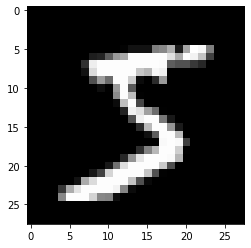

In [6]:
plt.imshow(X_train[0],cmap='gray')
print(Y_train[0])

In [7]:
print(X_train.shape)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])

(60000, 28, 28)


In [8]:
X_train.shape

(60000, 784)

In [9]:
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [10]:
#mlp
model=tf.keras.models.Sequential([
    Dense(64,input_dim=X_train.shape[1],activation='relu'),#input_layer
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')#output_layer

])

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=config.learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [12]:
output=model.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=10,callbacks=[WandbCallback()])

Epoch 1/10
1500/1500 [==============================] - 9s 4ms/step - loss: 1.7276 - accuracy: 0.6814 - val_loss: 0.6999 - val_accuracy: 0.8399 - _timestamp: 1646564478.0000 - _runtime: 18.0000
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5655 - accuracy: 0.8627 - val_loss: 0.4412 - val_accuracy: 0.8953 - _timestamp: 1646564483.0000 - _runtime: 23.0000
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3630 - accuracy: 0.9090 - val_loss: 0.3831 - val_accuracy: 0.9134 - _timestamp: 1646564489.0000 - _runtime: 29.0000
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2522 - accuracy: 0.9335 - val_loss: 0.2470 - val_accuracy: 0.9397 - _timestamp: 1646564494.0000 - _runtime: 34.0000
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1922 - accuracy: 0.9478 - val_loss: 0.2028 - val_accuracy: 0.9473 - _timestamp: 1646564499.0000 - _runtime: 39.0000
Epoch 6/10
1500/1500 [========

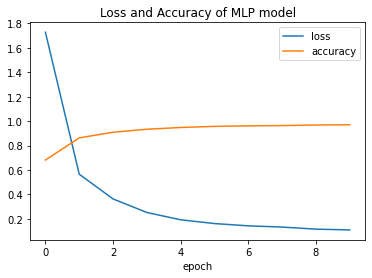

In [13]:
plt.plot(output.history['loss'])
plt.plot(output.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.title('Loss and Accuracy of MLP model')
plt.show()

In [14]:
print(X_test.shape)
print(Y_test.shape)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
print(X_test.shape)

(10000, 28, 28)
(10000,)
(10000, 784)


In [15]:

accuracy = model.evaluate(X_test,Y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.1609 - accuracy: 0.9640


In [16]:
X_train_deep,X_val_deep,Y_train_deep,Y_val_deep=train_test_split(X_train_deep,Y_train_deep,test_size=0.2,random_state=42)

In [17]:
X_train_deep,X_val_deep,X_test_deep = X_train_deep / 255.0,X_val_deep/255.0,X_test_deep / 255.0

In [18]:
model_deep=tf.keras.models.Sequential([
                                  layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                                  layers.MaxPooling2D(),
                                  layers.Conv2D(64,(3,3),activation='relu'),
                                  layers.MaxPooling2D(),
                                  layers.Conv2D(64,(5,5),activation='relu'),

                                  layers.Flatten(),

                                  layers.Dense(64,activation='relu'),
                                  layers.Dense(10,activation='softmax')

])

In [19]:
model_deep.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 64)          102464    
                                                                 
 flatten (Flatten)           (None, 64)               

In [20]:
model_deep.compile(tf.keras.optimizers.SGD(learning_rate=config.learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [21]:
output_deep=model_deep.fit(X_train_deep,Y_train_deep,epochs=10,callbacks=[WandbCallback()])

Epoch 1/10
1500/1500 [==============================] - 17s 6ms/step - loss: 2.2518 - accuracy: 0.2805 - _timestamp: 1646564545.0000 - _runtime: 85.0000
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 1.7713 - accuracy: 0.5976 - _timestamp: 1646564555.0000 - _runtime: 95.0000
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6469 - accuracy: 0.8275 - _timestamp: 1646564564.0000 - _runtime: 104.0000
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4137 - accuracy: 0.8809 - _timestamp: 1646564573.0000 - _runtime: 113.0000
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3476 - accuracy: 0.8970 - _timestamp: 1646564583.0000 - _runtime: 123.0000
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3067 - accuracy: 0.9089 - _timestamp: 1646564592.0000 - _runtime: 132.0000
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2763 

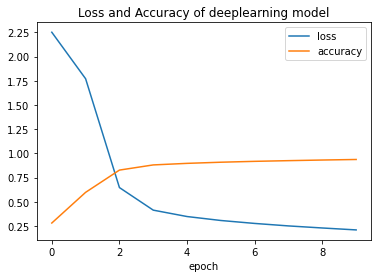

In [22]:
plt.plot(output_deep.history['loss'])
plt.plot(output_deep.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.title('Loss and Accuracy of deeplearning model')
plt.show()

In [23]:
model_deep.evaluate(X_test_deep,Y_test_deep)

313/313 [==============================] - 2s 4ms/step - loss: 0.1830 - accuracy: 0.9461


[0.18297824263572693, 0.9460999965667725]